In [70]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches
from tqdm.notebook import tqdm
import time
from shapely.geometry import Polygon, LineString
import pandas as pd
import seaborn as sns

In [3]:
vidcap = cv2.VideoCapture('pano1.avi')

In [4]:
fps = vidcap.get(cv2.CAP_PROP_FPS)

In [63]:
num_frames_vid = vidcap.get(cv2.CAP_PROP_FRAME_COUNT)

frame_indices = num_frames_vid * np.random.uniform(size=50)

In [101]:
num_frames_vid

4492.0

In [28]:
frames = []

for idx in frame_indices:
    vidcap.set(cv2.CAP_PROP_POS_FRAMES, idx)
    ret, frame = vidcap.read()
    frames.append(frame)
    
background = np.median(frames, axis = 0).astype(np.uint8)

In [29]:
bw_background = cv2.cvtColor(background, cv2.COLOR_BGR2GRAY)

In [78]:
data = []

In [127]:
num_frames = 8
vid = 'pano1.avi'
area_thres = 2000
save_name = 'pano1_detected.avi'

vidcap = cv2.VideoCapture(vid)
frame_diffs = []
ret = True
i = 0

start = time.time()

frame_width = int(vidcap.get(3))
frame_height = int(vidcap.get(4))

out = cv2.VideoWriter(
    save_name,
    cv2.VideoWriter_fourcc(*'DIVX'), fps/num_frames, 
    (frame_width, frame_height)
)

while True:
    ret, frame = vidcap.read()
    if ret:
        bw_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frame_diff = cv2.absdiff(bw_frame, bw_background)
        ret, thres = cv2.threshold(frame_diff, 50, 255, cv2.THRESH_BINARY)
        dilate_frame = cv2.dilate(thres, None, iterations=2)
        frame_diffs.append(dilate_frame)
        if i % num_frames == num_frames - 1:
            print(f'{round(time.time() - start, 3)} seconds, {round((i/num_frames_vid)*100, 1)}% complete')
            to_save = sum(frame_diffs)
            contours, hierarchy = cv2.findContours(to_save, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            to_save = cv2.cvtColor(to_save, cv2.COLOR_GRAY2RGB)
            cp = background.copy()
            cp[to_save > 0] = 255
            frame_diffs = []
            for c in contours:
                if cv2.contourArea(c) < area_thres:
                    continue
                else:
                    (x, y, w, h) = cv2.boundingRect(c)
                    player_feet = LineString([[x, y + h], [x + w, y + h]])
                    if court_poly.contains(player_feet):
                        # data.append([i, x, w, y, h])
                        cv2.rectangle(cp, (x, y), (x+w, y+h), (255, 0, 0), 2)
                        cv2.polylines(cp, [np.array(points).reshape((-1, 1, 2))],
                                      isClosed = True, color = (0, 0 ,255), thickness = 5)
                        cv2.line(cp, (x, y + h), (x + w, y + h), (0, 255, 0), thickness = 5)
            try:
                com_ = com_df.loc[i]
                cv2.line(cp, (com_, 0), (com_, frame_height), (0, 0, 255), thickness = 5)
            except Exception as e:
                pass
            out.write(cp)
        i += 1
    else:
        break

vidcap.release()
cv2.destroyAllWindows()
out.release()

0.625 seconds, 0.2% complete
1.29 seconds, 0.3% complete
1.93 seconds, 0.5% complete
2.575 seconds, 0.7% complete
3.169 seconds, 0.9% complete
3.771 seconds, 1.0% complete
4.372 seconds, 1.2% complete
4.993 seconds, 1.4% complete
5.606 seconds, 1.6% complete
6.206 seconds, 1.8% complete
6.904 seconds, 1.9% complete
7.53 seconds, 2.1% complete
8.239 seconds, 2.3% complete
8.938 seconds, 2.5% complete
9.586 seconds, 2.6% complete
10.308 seconds, 2.8% complete
10.931 seconds, 3.0% complete
11.584 seconds, 3.2% complete
12.508 seconds, 3.4% complete
13.416 seconds, 3.5% complete
14.079 seconds, 3.7% complete
14.762 seconds, 3.9% complete
15.406 seconds, 4.1% complete
16.01 seconds, 4.3% complete
16.644 seconds, 4.4% complete
17.288 seconds, 4.6% complete
17.902 seconds, 4.8% complete
18.549 seconds, 5.0% complete
19.205 seconds, 5.1% complete
19.814 seconds, 5.3% complete
20.445 seconds, 5.5% complete
21.097 seconds, 5.7% complete
21.757 seconds, 5.9% complete
22.389 seconds, 6.0% complete

164.892 seconds, 47.4% complete
165.699 seconds, 47.5% complete
166.504 seconds, 47.7% complete
167.504 seconds, 47.9% complete
168.468 seconds, 48.1% complete
169.195 seconds, 48.2% complete
170.045 seconds, 48.4% complete
170.891 seconds, 48.6% complete
171.659 seconds, 48.8% complete
172.316 seconds, 49.0% complete
173.036 seconds, 49.1% complete
173.777 seconds, 49.3% complete
174.622 seconds, 49.5% complete
175.266 seconds, 49.7% complete
175.9 seconds, 49.8% complete
176.672 seconds, 50.0% complete
177.344 seconds, 50.2% complete
178.089 seconds, 50.4% complete
178.858 seconds, 50.6% complete
179.591 seconds, 50.7% complete
180.22 seconds, 50.9% complete
180.833 seconds, 51.1% complete
181.434 seconds, 51.3% complete
182.085 seconds, 51.4% complete
182.718 seconds, 51.6% complete
183.338 seconds, 51.8% complete
183.958 seconds, 52.0% complete
184.671 seconds, 52.2% complete
185.407 seconds, 52.3% complete
186.162 seconds, 52.5% complete
186.829 seconds, 52.7% complete
187.432 sec

326.517 seconds, 93.3% complete
327.129 seconds, 93.5% complete
327.777 seconds, 93.7% complete
328.365 seconds, 93.8% complete
328.954 seconds, 94.0% complete
329.571 seconds, 94.2% complete
330.196 seconds, 94.4% complete
330.794 seconds, 94.5% complete
331.374 seconds, 94.7% complete
331.982 seconds, 94.9% complete
332.569 seconds, 95.1% complete
333.161 seconds, 95.3% complete
333.759 seconds, 95.4% complete
334.342 seconds, 95.6% complete
334.95 seconds, 95.8% complete
335.591 seconds, 96.0% complete
336.197 seconds, 96.1% complete
336.796 seconds, 96.3% complete
337.419 seconds, 96.5% complete
338.014 seconds, 96.7% complete
338.651 seconds, 96.9% complete
339.271 seconds, 97.0% complete
339.858 seconds, 97.2% complete
340.452 seconds, 97.4% complete
341.04 seconds, 97.6% complete
341.63 seconds, 97.8% complete
342.245 seconds, 97.9% complete
342.881 seconds, 98.1% complete
343.478 seconds, 98.3% complete
344.067 seconds, 98.5% complete
344.687 seconds, 98.6% complete
345.281 sec

In [113]:
df['frame'].value_counts()

1399    17
1887    16
1759    16
1783    15
1895    15
        ..
3711     2
3423     2
3703     2
3695     2
287      2
Name: frame, Length: 556, dtype: int64

In [118]:
((1399 - 7)/8)/3

58.0

In [80]:
df = pd.DataFrame(data, columns = ['frame', 'x', 'w', 'y', 'h'])

In [129]:
df['x_mid'] = df['x'] + df['w']*(1/2)

# df['com'] = df['x_mid']*df['w']

# com_df = df[['frame', 'com']].groupby('frame').sum()/(df[['frame', 'w']].groupby('frame').sum().values)

com_df = df[['frame', 'x_mid']].groupby('frame').median()

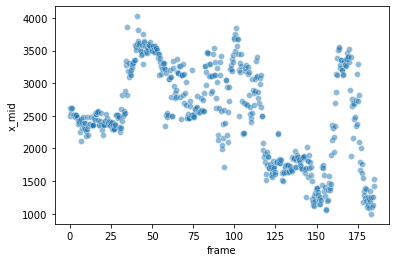

In [130]:
sns.scatterplot(x = ((com_df.index - 7)/8)/3, y = com_df['x_mid'], alpha = 0.5)

### lines

bottom left corner - 270, 940

left bottom - 1380, 1440

right bottom - 3500, 1440

bottom right -  4490, 985

top right - 3475, 380

top left - 1310, 345

In [10]:
image = cv2.imread('picture1.jpg')



cv2.polylines(image, [np.array(points).reshape((-1, 1, 2))], isClosed = True, color = (0, 0 ,255), thickness = 5)
cv2.imwrite('pic.jpg', image)

NameError: name 'points' is not defined

In [13]:
points = [[270, 940],
          [1380, 1440],
          [3500, 1440],
          [4490, 985],
          [3475, 380],
          [3000, 300],
          [2385, 255],
          [1810, 280],
          [1310, 345]]

court_poly = Polygon(points)